## **OOP: EXAMPLE 3**

1. Extract functions from **Example 1** (Define a method to calculate different mathematical operations), save it in a file, load it and finally use it.

In [2]:
%load_ext autoreload
%autoreload 2
# load my own functions
from utils.Calc import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
## Execution
a= 2
b= 2
x = Calc(a,b)
x.add()

4

*************************************

2. Extract functions from **Example 2** (Build a simple linear regression estimator class following the OOP paradigm), save it in a file, load it and finally use it.

### **First Alternative**

In [11]:
%load_ext autoreload
%autoreload 2
# load my own functions
from utils.MyLinearRegression import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
mlr = MyLinearRegression()

In [13]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

In [14]:
mlr.fit(X,y)

In [15]:
print("We have fitted the data.")
print("Regression coefficients:", mlr.coef_)
print("The intercept term is given by: ", mlr.intercept_)

We have fitted the data.
Regression coefficients: [ 3.29143065 -0.99441328]
The intercept term is given by:  -0.2457721649029594


### **Second Alternative**

In [16]:
from MyLinearRegressionClass import MyLinearRegression as mlr
import numpy as np
import matplotlib.pyplot as plt

In [17]:
num_samples=40
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+10*np.random.randn(num_samples)

In [18]:
model = mlr()

In [19]:
model.ingest_data(X,y)

In [20]:
model.features_[:10]

array([[9.50832053, 4.69873457, 7.30492029, 8.24567096, 6.5035443 ],
       [0.94867602, 6.80409561, 8.97250613, 0.88215575, 2.48113761],
       [9.037479  , 7.14792068, 3.44068911, 5.73528237, 8.34572629],
       [3.86547957, 5.83773383, 9.06239632, 9.61971094, 9.96188424],
       [7.75326153, 9.95060943, 6.892683  , 3.93338085, 3.48408685],
       [4.34351965, 3.45599078, 4.31943089, 8.89492319, 0.91847951],
       [1.79613916, 2.63379873, 3.79245984, 9.6992359 , 8.03827075],
       [3.55077295, 7.88969098, 6.64310709, 1.00221497, 5.73637532],
       [3.86564008, 7.27428484, 6.12608758, 1.33869322, 0.9908468 ],
       [6.85375206, 8.07432389, 3.64559702, 7.66709763, 0.02934221]])

## **Degrees of freedom**

Atributes associated with the dataset -degrees of freedom. They will be computed when we try to fit a dataset.

* dft_:degrees of freedom of the estimate of the population variance of the dependent variable
* dfe_:degrees of freedom of the estimate of the underlying population error variance

In [36]:
model.dfe_

34

In [ ]:
model.dft_

#### **Fit the model with fit**

In [22]:
model.fit()

In [24]:
# print parameters
print ("R-squared: ",model.r_squared())
print ("Adjusted R-squared: ",model.adj_r_squared())
print("MSE: ",model.mse())

R-squared:  0.8441062527631279
Adjusted R-squared:  0.8211807016988819
MSE:  86.21159188226451


In [25]:
print("P-values:",model.pvalues())
print("t-test values:",model.tvalues())
print("Standard errors:",model.std_err())

P-values: [8.99354443e-01 1.37068801e-03 1.50144078e-07 3.44614395e-01
 4.67320113e-09 6.93903915e-04]
t-test values: [ 0.12742533  3.48653965 -6.58760302  0.95842554  7.78343114 -3.73153592]
Standard errors: [6.63936285 0.58536125 0.56802351 0.68347235 0.51679313 0.59834872]


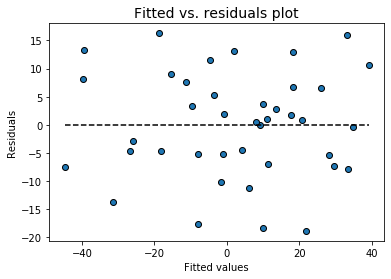

In [26]:
# Fitted vs. residuals plot (to check for linearity and homoscadasticity)
model.fitted_vs_residual()

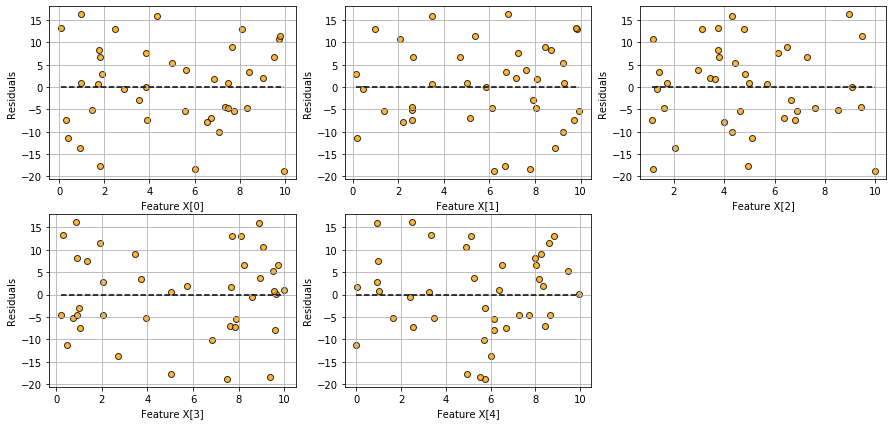

In [27]:
#Fitted values vs. feature variables
model.fitted_vs_features()

This may take a little time. Have patience...


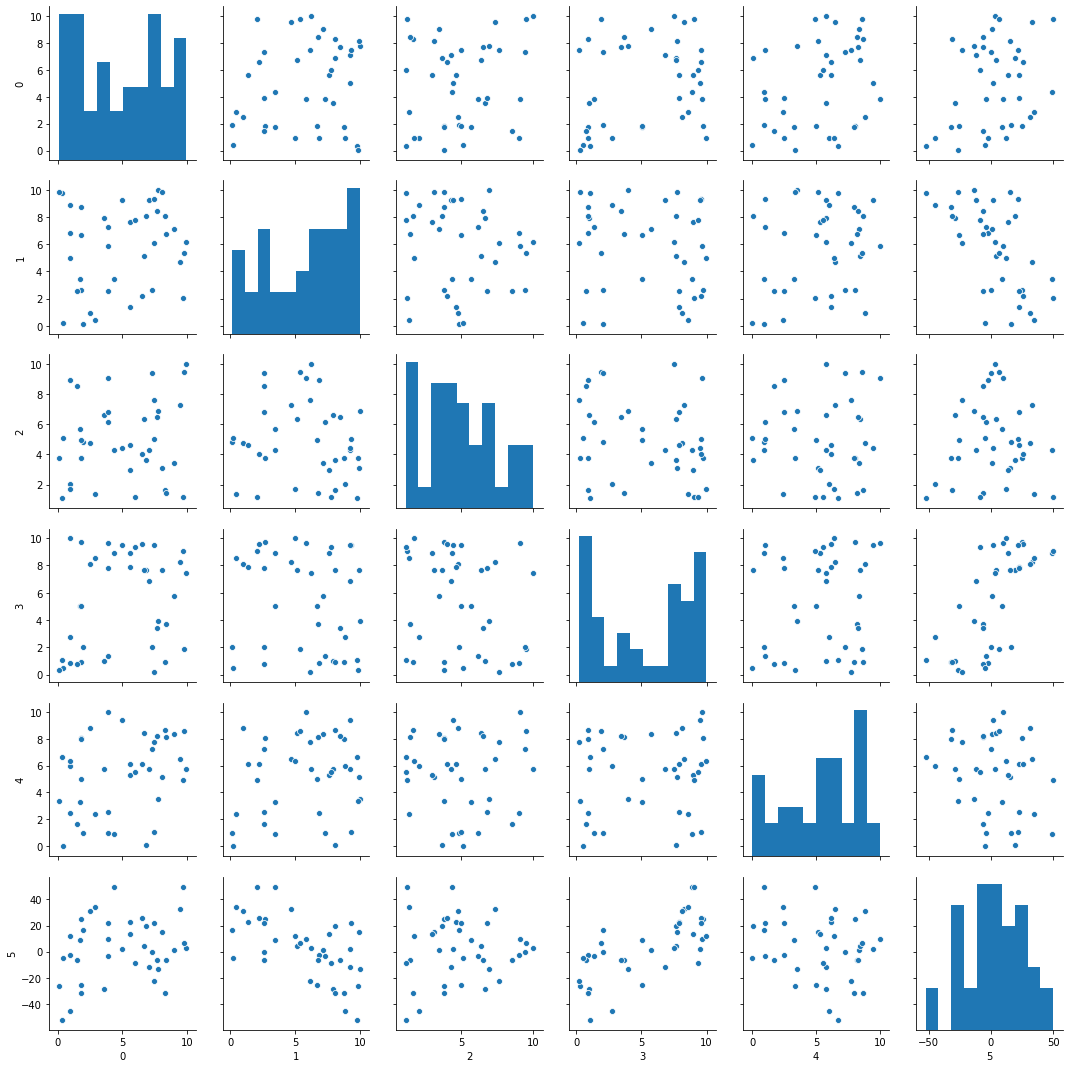

In [28]:
#Pairplot of the dataset
model.pairplot()

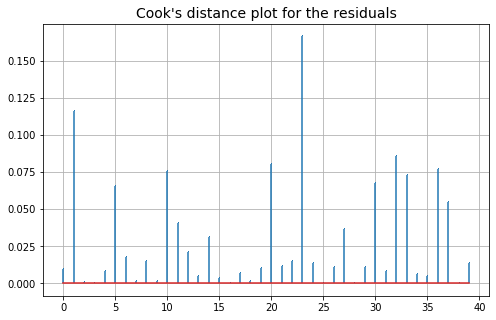

In [29]:
#Cook's distance plot
model.cook_distance()

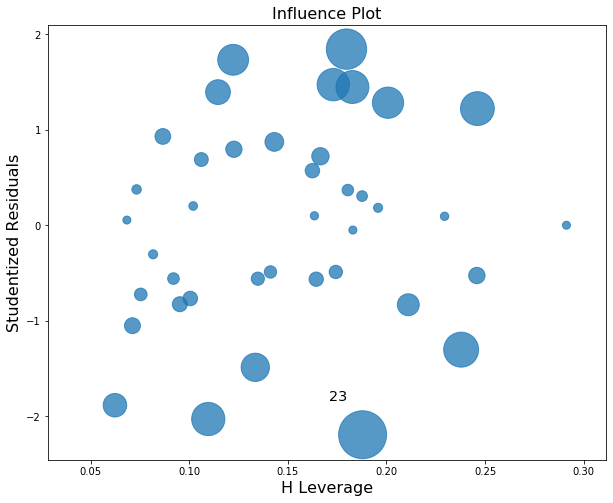

In [30]:
#Influence plot
model.influence_plot()

In [31]:
#Variance inflation factors
model.vif()

Variance inflation factor for feature 0: 4.62
Variance inflation factor for feature 1: 3.71
Variance inflation factor for feature 2: 3.3
Variance inflation factor for feature 3: 3.0
Variance inflation factor for feature 4: 4.77


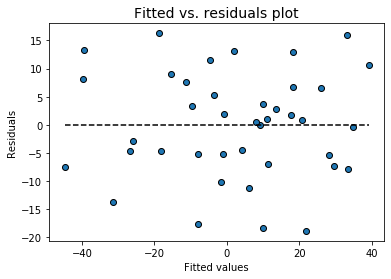

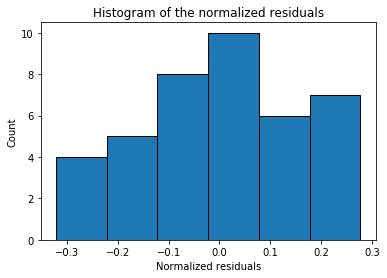

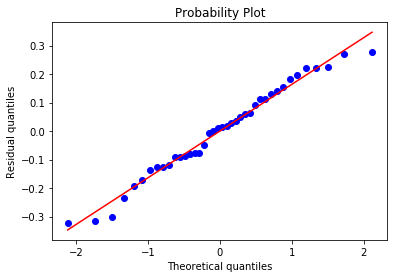


The residuals seem to have come from a Gaussian process


In [32]:
#Generate all diagnostics plots with run_diagnostics
model.run_diagnostics()

In [33]:
#Predict with new samples
num_samples=20
num_dim =5
X_test = 10*np.random.random(size=(num_samples,num_dim))
model.predict(X_test)

array([-10.79036428,   6.77909431, -14.0110643 ,  17.21773351,
        10.9384582 ,  -5.71262205,  25.50355981,  16.50319118,
       -25.55135907,  12.9429567 , -18.36772727,  13.08126639,
        32.60201104, -21.43205087,  -3.71639085,  16.91695397,
         5.66687118,  24.1999559 , -21.88474378, -10.04665094])

## **Ingest data, fit model, and plot visual diagnostics in a loop**

This is the big advantage of OOP. Once you have compact representation of your class, you can call methods and visualize for a lot of cases, on a continuous loop.

Here, we are increasing the noise level of the data, fitting model, and plotting the Q-Q plot.


Simulating a regression problem...


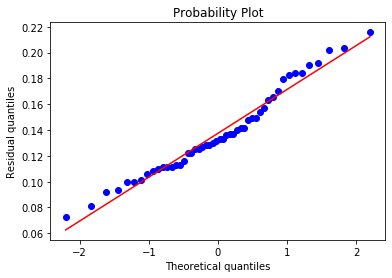


Simulating a regression problem...


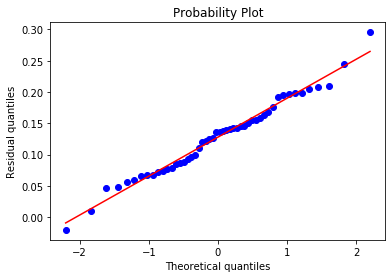


Simulating a regression problem...


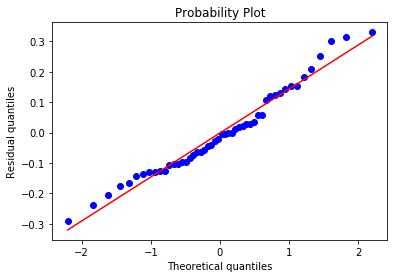


Simulating a regression problem...


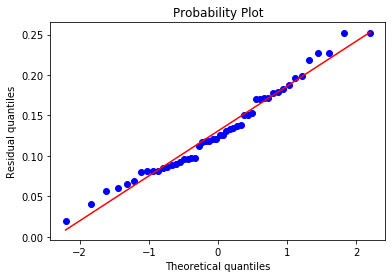

In [34]:
num_samples=50
num_dim = 15
X = np.random.random(size=(num_samples,num_dim))
coeff = np.random.randint(-10,10,num_dim)   
m = mlr()

for i in range(5,21,5):
    print(f"\nSimulating a regression problem...")
    y = np.dot(coeff,X.T)+i*np.random.normal(num_samples)
    m.ingest_data(X,y)
    m.fit()
    m.qqplot_resid()

## **REFERENCES**

Alternatives:

* [Importing Jupyter Notebooks as Modules](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Importing%20Notebooks.html)